In [12]:
import matplotlib.pyplot as plt
import numpy as np

from MyGA import MyGA

In [13]:
NTrials = 10 ** 4


def computeTourLength(perm, Graph):
    """
    @author: ofersh@telhai.ac.il
    """
    tlen = 0.0
    for i in range(len(perm)):
        tlen += Graph[perm[i], perm[((i + 1) % len(perm))]]
    return tlen


def tournament_selection(fitnessPop, mu, tournament_size=3):
    """
    @author: chatGPT
    """
    indices = []
    for _ in range(mu):
        # Randomly select a subset of individuals
        subset = np.random.choice(len(fitnessPop), size=tournament_size, replace=False)
        # Choose the individual with the best fitness
        best = subset[np.argmin(fitnessPop[subset])]
        indices.append(best)
    return np.array(indices)

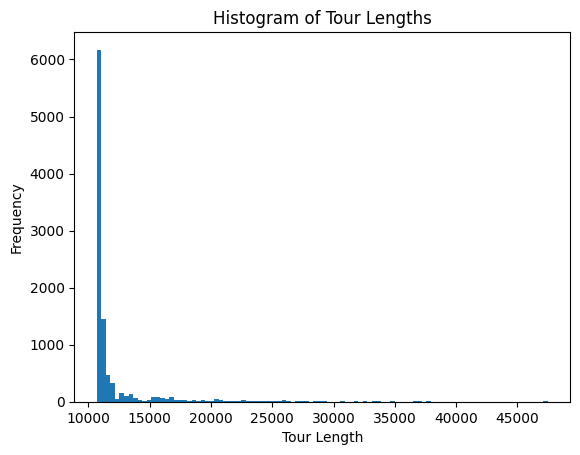

In [14]:
myga = MyGA(150, (lambda x: x), tournament_selection, computeTourLength)
tourStat = []
for k in range(NTrials):
    myga.run()
    tourStat.append(myga.fmin)
plt.hist(tourStat, bins=100)
plt.ylabel('Frequency')  # Label for x-axis
plt.xlabel('Tour Length')  # Label for y-axis
plt.title('Histogram of Tour Lengths')
plt.show()

In [15]:
print(f"fmin tournament_selection: {myga.fmin}")

fmin tournament_selection: 10701.76004433132
